# Python Basics

These assignments aim to get you acquainted with Python, which is an important requirement for all the research done at Solarillion Foundation. Apart from teaching you Python, these assignments also aim to make you a better programmer and cultivate better coding practices. 

Visit these links for more details: <br>
PEP8 Practices: https://www.python.org/dev/peps/pep-0008/ <br>
Check PEP8: http://pep8online.com <br>
Python Reference: https://www.py4e.com/lessons <br>

Do use Google efficiently, and refer to StackOverflow for clarifying any programming doubts. If you're still stuck, feel free to ask a TA to help you.

Each task in the assignment comprises of at least two cells. There are function definitions wherein you will name the function(s), and write code to solve the problem at hand. You will call the function(s) in the last cell of each task, and check your output.

We encourage you to play around and learn as much as possible, and be as creative as you can get. More than anything, have fun doing these assignments. Enjoy!

# Important
* **Only the imports and functions must be present when you upload this notebook to GitHub for verification.** 
* **Do not upload it until you want to get it verified. Do not change function names or add extra cells or code, or remove anything.**
* **For your rough work and four showing your code to TAs, use a different notebook with the name Module2Playground.ipynb and copy only the final functions to this notebook for verification.**

# Module 3
Scope: Algorithmic Thinking, Programming

## Imports - Always Execute First!
Import any modules and turn on any magic here:

In [1]:
import random
import matplotlib.pyplot as plt

## Burger Mania

In [2]:
"""
Imagine that you are a restaurant's cashier and are trying to keep records for analysing profits.

Your restaurant sells 7 different items:
    1. Burgers - $4.25
    2. Nuggets - $2.50
    3. French Fries - $2.00
    4. Small Drink - $1.25
    5. Medium Drink - $1.50
    6. Large Drink - $1.75
    7. Salad - $3.75

Create a program to randomly generate the orders of each customer as a string of numbers
(corresponding to the item) and calculate the cost of the order. For example, if the generated
string is 5712335, the program should understand that the customer has ordered 1 burger, 1 
portion of nuggets, 2 portions of fries, 2 medium drinks and 1 salad. It should then compute the
cost ($17.50). The final cost is calculated after considering discounts for combo offers and
adding 18% GST.

The combo offers are:
A) 1 Burger + 1 Portion of Fries + 1 Drink -> 20% discount
B) 1 Burger + 1 Portion of Nuggets + 1 Salad + 1 Drink -> 35% discount

The final cost of the 5712335 order is $13.4225. The profit gained each day has to be recorded for
30 days and plotted for analysis.

Note:
    - There will be at least 20 customers and not more than 50 customers per day. Each customer
      orders at least 3 items and not more than 7 items.
    - If there is a possibility of availing multiple combo offers in an order, the program
      should select the offer with maximum discount.
"""

"\nImagine that you are a restaurant's cashier and are trying to keep records for analysing profits.\n\nYour restaurant sells 7 different items:\n    1. Burgers - $4.25\n    2. Nuggets - $2.50\n    3. French Fries - $2.00\n    4. Small Drink - $1.25\n    5. Medium Drink - $1.50\n    6. Large Drink - $1.75\n    7. Salad - $3.75\n\nCreate a program to randomly generate the orders of each customer as a string of numbers\n(corresponding to the item) and calculate the cost of the order. For example, if the generated\nstring is 5712335, the program should understand that the customer has ordered 1 burger, 1 \nportion of nuggets, 2 portions of fries, 2 medium drinks and 1 salad. It should then compute the\ncost ($17.50). The final cost is calculated after considering discounts for combo offers and\nadding 18% GST.\n\nThe combo offers are:\nA) 1 Burger + 1 Portion of Fries + 1 Drink -> 20% discount\nB) 1 Burger + 1 Portion of Nuggets + 1 Salad + 1 Drink -> 35% discount\n\nThe final cost of the

In [17]:
def generate_order():
    """
        Function 1: generate_order()
        Return: A randomly generated order string
    """
    global k2,str1
    k2={}
    for y in range(1,31):
        customer=random.randint(20,50)  #customer count per day
        k={}
        for i in range(1,customer+1):
            temp=[]
            str1=""
            order_quantity=random.randint(3,7)
            for j in range(0,order_quantity):
                order=random.randint(1,7) #individual order
                order_str=str(order)
                str1+=order_str #conversion of integer order to string(cuz specified in docstring)
            temp.append(str1)
            k[i]=temp #order for one day
        k2[y]=k #order for 30 days
    return str1  #change it to k2 - for orders of 30 days, k - for orders of one day
    

In [22]:
generate_order()

'7254151'

In [29]:
def compute_cost(str1):
    """
        Function 2: compute_cost(order)
        Parameters: order (String)
        Return: Final cost of order
    """
    gst=18/100
    cost=0
    cost2=0
    cost3=0
    price=0
    print(str1)
    for i in str1:

        #print(i,end="-")
        for sub in i:
            if sub=="1":
                cost=cost+4.25
                #print(cost)
            if sub=="2":
                cost=cost+2.5
                #print(cost)
            if sub=="3":
                cost=cost+2.0
                #print(cost)
            if sub=="4":
                cost=cost+1.25
                #print(cost)
            if sub=="5":
                cost=cost+1.5
                #print(cost)
            if sub=="6":
                cost=cost+1.75
                #print(cost)
            if sub=="7":
                cost=cost+3.75
                #print(cost)
        disc=0        
        if "4" or "5" or "6" in str1:
            if "1" in str1:
                if "3" in str1:
                    disc=20/100
            if "1" in str1:
                if "2" in str1:
                    if "7" in str1:
                        disc=35/100  #automatically chooses the highest discount due to control flow
       # print(disc)
        cost2=gst*cost
        cost3=disc*cost
        price=cost-cost3+cost2
    return price

In [30]:
compute_cost(str1)

7254151


15.770000000000001

In [31]:
def simulate_restaurant():
    """
        Function 3: simulate_restaurant()
        Purpose: Simulate the restaurant's operation using the previously declared functions,
                 based on the constraints mentioned in the question
        Output: Plot of profit over 30 days
    """
    gst=18/100
    price_dict={}
    i1=0
    for keys, values in k2.items():   
            temp2=[]
            total=0
            i1=i1+1

            #print(values,end="###")
            for q, j in values.items():
                #print(j,end="-")
                for i in j:
                    cost=0
                    cost2=0
                    cost3=0
                    price=0
                    #print(i,end="-")
                    for sub in i:
                        if sub=="1":
                            cost=cost+4.25
                        if sub=="2":
                            cost=cost+2.5
                        if sub=="3":
                            cost=cost+2.0
                        if sub=="4":
                            cost=cost+1.25
                        if sub=="5":
                            cost=cost+1
                        if sub=="6":
                            cost=cost+1.75
                        if sub=="7":
                            cost=cost+3.75
                    disc=0        
                    if "4" or "5" or "6" in i:
                        if "1" in i:
                            if "3" in i:
                                disc=20/100
                        if "1" in i:
                            if "2" in i:
                                if "7" in i:
                                    disc=35/100

                    cost2=gst*cost
                    cost3=disc*cost
                    price=cost-cost3+cost2
                    total+=price
                    #print("%.2f" %price)

            if total not in price_dict.values():
                price_dict[i1]=total

    plt_x=price_dict.keys()
    plt_y=price_dict.values()
    plotty=plt.plot(plt_x, plt_y)
    plt.xlabel('Days')
    plt.ylabel('Income')
    plt.title('ProfitPlot')
    plt.show()

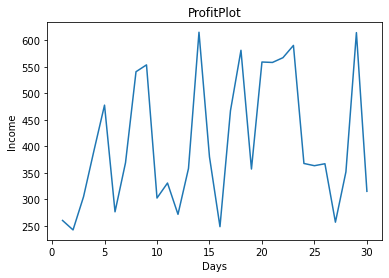

In [32]:
simulate_restaurant()

You're done with the Basics of Python! Give yourself a pat on the back.

Now, choose an area you want to work on - Machine Learning, Internet of Things or Microgrids - and get started with the assignments. You could also choose to do assignments from multiple areas, it's entirely up to you. Hope you have fun!